In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import json
from config import api_key

In [59]:
url = "https://api.api-ninjas.com/v1/country"

In [60]:
response= requests.get(url, headers={'X-Api-Key': api_key}, params={'name': 'US'}).json()
response

[{'gdp': 20580223.0,
  'sex_ratio': 97.9,
  'surface_area': 9833517.0,
  'life_expectancy_male': 76.3,
  'unemployment': 3.9,
  'imports': 2567490.0,
  'homicide_rate': 5.0,
  'currency': {'code': 'USD', 'name': 'Us Dollar'},
  'iso2': 'US',
  'employment_services': 79.0,
  'employment_industry': 19.7,
  'urban_population_growth': 0.9,
  'secondary_school_enrollment_female': 98.7,
  'employment_agriculture': 1.3,
  'capital': 'Washington, D.C.',
  'co2_emissions': 4761.3,
  'forested_area': 33.9,
  'tourists': 79746.0,
  'exports': 1644280.0,
  'life_expectancy_female': 81.3,
  'post_secondary_enrollment_female': 102.0,
  'post_secondary_enrollment_male': 75.0,
  'primary_school_enrollment_female': 101.4,
  'infant_mortality': 5.8,
  'gdp_growth': 2.9,
  'threatened_species': 1655.0,
  'population': 331003.0,
  'urban_population': 82.5,
  'secondary_school_enrollment_male': 99.2,
  'name': 'United States',
  'pop_growth': 0.6,
  'region': 'Northern America',
  'pop_density': 36.2,
  'i

In [61]:
countries = ['US', 'CA', 'GB', 'KOR', 'DEU', 'JP', 'EE', 'FI', 'FRA', 'MEX']
GDP1 = []
CN = []
UE = []
for country in countries:
    try:
        response = requests.get(url, headers={'X-Api-Key': api_key}, params={'name': country})
        
        if response.status_code == 200:
            data = response.json()
            GDP1.append(data[0]["gdp_per_capita"])
            CN.append(data[0]["iso2"])
            UE.append(data[0]["unemployment"])

        else:
            print(f"Failed to retrieve data for {country}. Status Code: {response.status_code}")
    
    except requests.exceptions.RequestException as e:
        print(f"An error occurred: {e}")

In [62]:
ll = [6.521, 6.841, 6.658, 6.112, 6.792, 5.910, 6.430, 7.699, 6.557, 7.006]

In [63]:
df = pd.DataFrame({"country": CN,
                   "gdp": GDP1,
                   "unemployment_rate": UE,
                   "life_ladder": ll})

df 

,country,gdp,unemployment_rate,life_ladder
0,US,62917.9,3.9,6.521
1,CA,46192.4,5.4,6.841
2,GB,42526.4,4.1,6.658
3,KR,33621.9,4.6,6.112
4,DE,47513.7,3.0,6.792
5,JP,39082.1,2.3,5.910
6,EE,23241.9,5.4,6.430
7,FI,50135.7,6.7,7.699
8,FR,41358.1,8.3,6.557
9,MX,9694.9,3.6,7.006


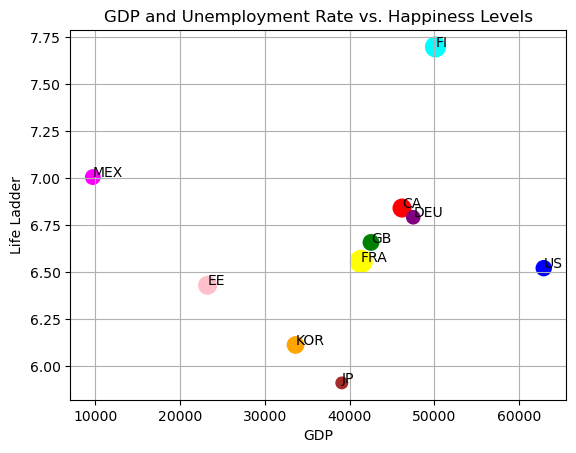

In [64]:

country_colors = { 'US': 'blue', 'CA': 'red', 'GB': 'green', 'KR': 'orange', 'DE': 'purple', 'JP': 'brown', 'EE': 'pink', 'FI': 'cyan', 'FR': 'yellow', 'MX': 'magenta'}
colors = df['country'].map(country_colors)
sizes = df['unemployment_rate']*30
ax1 = df.plot.scatter(x= "gdp", y = "life_ladder", color= colors, s = sizes)
handles = [plt.Line2D([0], [0], marker='o', color='w', label=country, markersize=10, markerfacecolor=color) 
           for country, color in country_colors.items()]
y = df["life_ladder"]
x= df["gdp"]
for i, label in enumerate(countries):
    plt.annotate(label, (x[i], y[i]))
plt.title("GDP and Unemployment Rate vs. Happiness Levels")
plt.xlabel("GDP")
plt.ylabel("Life Ladder")
plt.grid(True)
plt.savefig("GDP and Unemployment Rate vs. Happiness Levels.png")
plt.show()